# Data Analysis of Singapore's Private Property Market

This notebook was created to conduct data analysis and data visualization on the various aspects of Singapore's property market. This assignment is part of Singapore Polytechnic's `IT8701 - Introduction to Programming for Data Science`. 

The main aim of this exercise is to analyse Singapore's private residential property market.

We'll be using datasets from the [Urban Redevelopment Authority (URA)](https://www.ura.gov.sg/Corporate), the national urban planning authority of Singapore, and a statutory board under the Ministry of National Development. To supplment our analysis, we will also be using data from the [Monetary Authority of Singapore (MAS)](https://www.mas.gov.sg/), the central bank of Singapore.

The notebook is structured as follows:

**Section 1: Private Property Market Overview**  
Datasets:
- [Private Residential Property Transactions in the Whole of Singapore](https://beta.data.gov.sg/collections/1658/view)

**Section 2: Interest Rates & Private Property Sold**  
Datasets:
- [Private Residential Property Transactions in the Whole of Singapore](https://beta.data.gov.sg/collections/1658/view)
- [SORA Interest Rates](https://www.mas.gov.sg/monetary-policy/sora)

**Section 3: Private Property Price Index**  
Datasets:
- [Private Residential Property Price Index](https://beta.data.gov.sg/collections/1676/datasets/d_97f8a2e995022d311c6c68cfda6d034c/view)
- [HDB Resale Price Index](https://beta.data.gov.sg/collections/152/view)

**Section 4: Analyzing Singapore's 3 Main Regions**  
Datasets:
- [Private Property Transactions](https://www.ura.gov.sg/property-market-information/pmiResidentialTransactionSearch)

---

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set colour palette
color1='#FE7A36'
color2='#3652AD'
color3='#280274'
color4='#E9F6FF'

color5='#8CB9BD'
color6='#FEFBF6'
color7='#ECB159'
color8='#B67352'

color9='#D6D46D'
color10= '#F4DFB6'
color11= '#DE8F5F'
color12= '#9A4444'

color13='#cccccc'

color_palette1 = [color1,color2,color3,color4]
color_palette2 = [color5,color6,color7,color8]
color_palette3 = [color9,color10,color11,color12]
allcolors = [color1,color2,color3,color4,color5,color6,color7,color8,color9,color10,color11,color12]

In [3]:
# helper function to check for unique values in df
def unique_values_checker(df):    
    for i in df.columns:
        print(i)
        print(np.unique(df[i]))
        print()
        
# helper function to check for null values
def null_checker(df):    
    for i in df.columns:
        print(f"{i}: {df[i].isnull().sum()}")
    print()
    print(f"Total null values in dataframe: {df[i].isnull().sum().sum()}")

---

# Section 1: Private Property Market Overview

**Introduction**

In this section, we will look at the volume of private property units sold from Q4 1999 to Q3 2023.

The aim of this section is to get a bird's eye view on the market and see if there are any noticeable trends through the decades.

**Dataset Used in This Section**  
[Private Residential Property Transactions in the Whole of Singapore](https://beta.data.gov.sg/collections/1658/view)

In [4]:
# dataset for all private properties transaction
private_property = pd.read_csv("PrivateResidentialPropertyTransactionsintheWholeofSingaporeQuarterly.csv")
private_property.head()

,quarter,type_of_sale,sale_status,units
0,1999-Q4,New Sale,Completed,234
1,1999-Q4,New Sale,Uncompleted,756
2,1999-Q4,Resale,na,1942
3,1999-Q4,Sub Sale,na,367
4,2000-Q1,New Sale,Completed,119


In [5]:
# preview dataset
private_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   quarter       384 non-null    object
 1   type_of_sale  384 non-null    object
 2   sale_status   384 non-null    object
 3   units         384 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 12.1+ KB


In [6]:
# check for each columns unique values and see if there are any null values
unique_values_checker(private_property)
null_checker(private_property)

quarter
['1999-Q4' '2000-Q1' '2000-Q2' '2000-Q3' '2000-Q4' '2001-Q1' '2001-Q2'
 '2001-Q3' '2001-Q4' '2002-Q1' '2002-Q2' '2002-Q3' '2002-Q4' '2003-Q1'
 '2003-Q2' '2003-Q3' '2003-Q4' '2004-Q1' '2004-Q2' '2004-Q3' '2004-Q4'
 '2005-Q1' '2005-Q2' '2005-Q3' '2005-Q4' '2006-Q1' '2006-Q2' '2006-Q3'
 '2006-Q4' '2007-Q1' '2007-Q2' '2007-Q3' '2007-Q4' '2008-Q1' '2008-Q2'
 '2008-Q3' '2008-Q4' '2009-Q1' '2009-Q2' '2009-Q3' '2009-Q4' '2010-Q1'
 '2010-Q2' '2010-Q3' '2010-Q4' '2011-Q1' '2011-Q2' '2011-Q3' '2011-Q4'
 '2012-Q1' '2012-Q2' '2012-Q3' '2012-Q4' '2013-Q1' '2013-Q2' '2013-Q3'
 '2013-Q4' '2014-Q1' '2014-Q2' '2014-Q3' '2014-Q4' '2015-Q1' '2015-Q2'
 '2015-Q3' '2015-Q4' '2016-Q1' '2016-Q2' '2016-Q3' '2016-Q4' '2017-Q1'
 '2017-Q2' '2017-Q3' '2017-Q4' '2018-Q1' '2018-Q2' '2018-Q3' '2018-Q4'
 '2019-Q1' '2019-Q2' '2019-Q3' '2019-Q4' '2020-Q1' '2020-Q2' '2020-Q3'
 '2020-Q4' '2021-Q1' '2021-Q2' '2021-Q3' '2021-Q4' '2022-Q1' '2022-Q2'
 '2022-Q3' '2022-Q4' '2023-Q1' '2023-Q2' '2023-Q3']

type_of_sale
['N

The dataset looks alright as there are no null values in it.

Next, we will add a column to capture the actual date of the each quarter's end.

There are 3 types of sale in this dataset: `New Sale`,  `Resale`, `Sub Sale`.

Using the `pivot_table` function, we will group the data according to sale type and extract the number of units sold for each type.

In [7]:
# pivot the data to get 'quarter' as index, 'type_of_sale' as columns, and 'units' as values
pivot_data = private_property.pivot_table(index='quarter',
                                          columns='type_of_sale',
                                          values='units',
                                          aggfunc='sum',
                                          fill_value=0)

pivot_data

type_of_sale,New Sale,Resale,Sub Sale
quarter,,,
1999-Q4,990,1942,367
2000-Q1,1252,1825,295
2000-Q2,1054,1588,261
2000-Q3,2149,1455,278
2000-Q4,951,1179,137
...,...,...,...
2022-Q3,2187,3719,242
2022-Q4,690,2694,204
2023-Q1,1256,2622,243


In [8]:
for i in pivot_data.columns:
    print(f"{i}: {np.sum(pivot_data[i])} units sold.")
print()
print(f'Total no. of private property units sold from Q4 1999 to Q3 2023: {pivot_data.sum().sum()}.')

New Sale: 244655 units sold.
Resale: 255868 units sold.
Sub Sale: 29641 units sold.

Total no. of private property units sold from Q4 1999 to Q3 2023: 530164.


 Next, we will plot a stacked bar chart based on the pivot table.

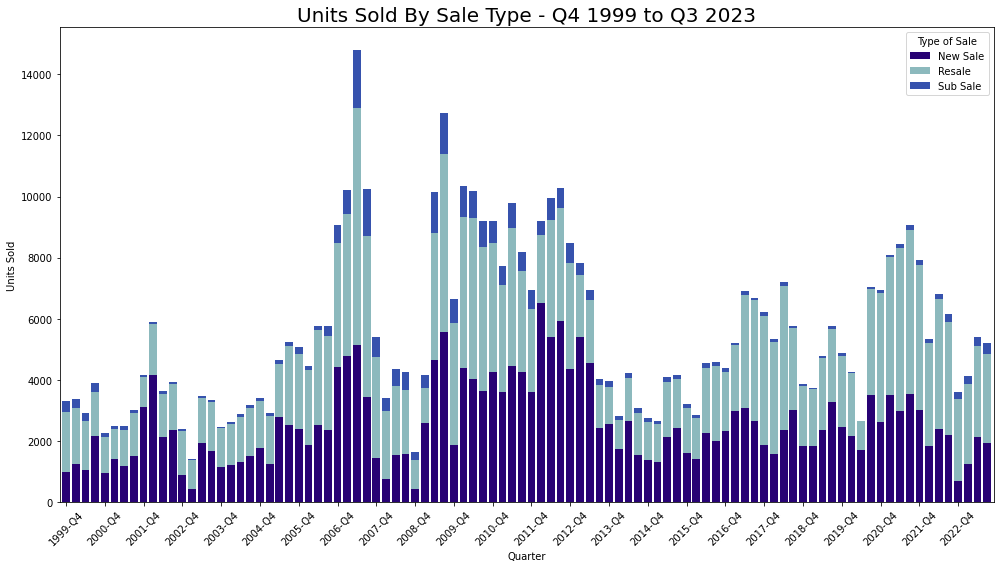

In [59]:
# Create a figure and axis object with subplots
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the stacked bar chart on the created axis object
pivot_data.plot(kind='bar',
                stacked=True,
                color=[color3, color5, color2],
                width=0.8,
                ax=ax)

# format x-label
x_positions = np.arange(len(pivot_data.index))
ax.set_xticks(x_positions[::4])  # Show every 4th label to reduce clutter
ax.set_xticklabels(pivot_data.index[::4], rotation=45)  # Rotate labels for better readability

# Set axis labels and title
ax.set_xlabel('Quarter')
ax.set_ylabel('Units Sold')
ax.set_title('Units Sold By Sale Type - Q4 1999 to Q3 2023', fontsize=20)

# Configure legend
ax.legend(title='Type of Sale')

# Use tight_layout to adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Analysis

Based on the volume of units sold during the period of Q4 1999 to Q3 2023, we noticed several distinct phases.

The first was the rapid buildup from early 2005. Policies that significantly boosted the housing market included:
- the relaxation of foreign ownership rules on apartments
- an increase of the maximum loan-to-value ratio from 80% to 90%
- a reduction of cash down payments from 10% to 5% for home purchase

However, after ~2 years of boom, the Great Financial Crisis of 2008 occured. The housing bubble in the US burst which ultimately led to a credit crunch that reverberated across the globe. The private property market in Singapore was not spared, resulting in the sharp decline in units sold from early 2007 to early 2009.

From 2009 to 2012, the volume of units remained elevated. Driven by low interest rates and the gradual recovery in the global economy, Singapore's property purchases recovered as well.

In early 2013, the Singapore government introduced significant cooling measures that made it harder for foreign buyers and non-first time owners. Amongst them were:
- ABSD rates raised between 5 and 7 percentage points.
- ABSD were be imposed on PRs purchasing their 1st residential property and on Singaporeans purchasing their 2nd residential property.

Although this resulted in the private property market stabilizing for the next few years, since early 2017, resale units' figures have been creeping up. As the world recovers from the COVID pandemic, barring significant government intervention, the private property market is poised to return to pre-pandemic levels.

---

# Section 2: Interest Rates & Private Property Sold

In the next section, we will look at a key driver in the property markets: interest rates. Below, we will visualize relationship between interest rates and private property sales.

First, we will download the daily domestic interest rates, known as [Singapore Overnight Rate Average (SORA)](https://www.mas.gov.sg/monetary-policy/sora), from the Monetary Authority of Singapore's website.

**Dataset Used in This Section**  
- [Private Residential Property Transactions in the Whole of Singapore](https://beta.data.gov.sg/collections/1658/view)
- [SORA Interest Rates](https://www.mas.gov.sg/monetary-policy/sora)

In [10]:
# read csv file
interest_rates_df = pd.read_csv("Domestic-Interest-Rates.csv")

# preview data
null_checker(interest_rates_df)
unique_values_checker(interest_rates_df)

interest_rates_df

SORA Publication Date: 0
SORA: 0

Total null values in dataframe: 0
SORA Publication Date
['01 Apr 2008' '01 Apr 2009' '01 Apr 2010' ... '31 Oct 2019' '31 Oct 2022'
 '31 Oct 2023']

SORA
[0.0054 0.0093 0.011  ... 4.0783 4.0825 4.3916]



,SORA Publication Date,SORA
0,03 Jan 2008,0.8657
1,04 Jan 2008,0.8140
2,07 Jan 2008,0.7057
3,08 Jan 2008,0.7294
4,09 Jan 2008,0.7957
...,...,...
4038,05 Feb 2024,3.4949
4039,06 Feb 2024,3.5972
4040,07 Feb 2024,3.6389
4041,08 Feb 2024,3.5840


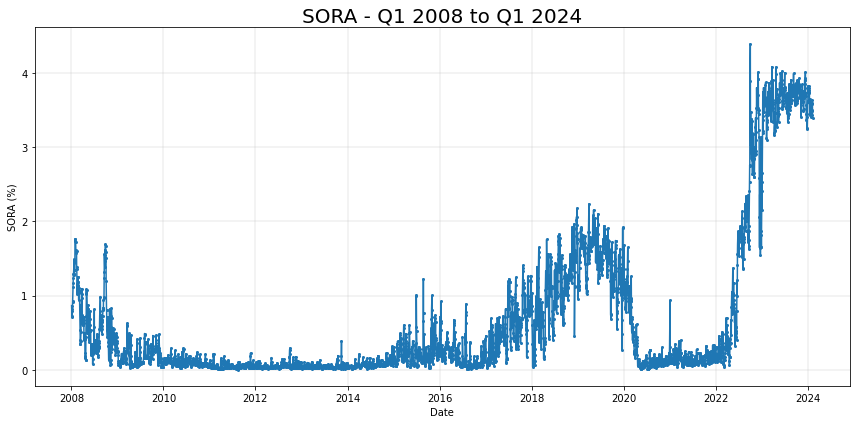

In [11]:
# convert 'SORA Publication Date' column to datetime for chart readability
interest_rates_df['SORA Publication Date'] = pd.to_datetime(interest_rates_df['SORA Publication Date'], format='%d %b %Y')

# plot data to gain preliminary understanding of dataset
plt.figure(figsize=(12, 6))
plt.plot(interest_rates_df['SORA Publication Date'],
         interest_rates_df['SORA'],
         marker='o',
         linestyle='-',
         markersize=2)

plt.title('SORA - Q1 2008 to Q1 2024', fontsize=20)
plt.xlabel('Date')
plt.ylabel('SORA (%)')
plt.grid(True, linewidth=0.3)
plt.tight_layout()
plt.show()

Due to the daily flucatuations, the chart does appear somewhat volatile. Yet, we still can observe some of the clearer trends in it. For example, from 2010 to 2015, interest rates have remained close to zero and only begun its steady increase from 2017 onwards.

Interest rates went down to near zero again in early 2020 as policymakers dealt with the COVID pandemic. 

However, to combat the inflationary pressures accumulated the pandemic, the MAS hiked rates from 2022 onwards, in line with the actions of the US Federal Reserve.

We would like to see if there exists a relationship between the volume of private property units sold and interest rates movements.

In preparation for overlaying the interest rates onto transaction value, we will process the data below.

In [12]:
# filter for New Sales only
private_property_new_sale = private_property[private_property['type_of_sale'] == 'New Sale']
private_property_new_sale = private_property_new_sale.groupby('quarter')['units'].sum().reset_index()
private_property_new_sale

,quarter,units
0,1999-Q4,990
1,2000-Q1,1252
2,2000-Q2,1054
3,2000-Q3,2149
4,2000-Q4,951
...,...,...
91,2022-Q3,2187
92,2022-Q4,690
93,2023-Q1,1256
94,2023-Q2,2127


In [13]:
# helper function to convert string format 'Year-Quarter_number' to actual date of quarter end
def quarter_end_date(quarter_string):
    year, quarter = quarter_string.split('-')  # split date string into year and quarter
    quarter_map = {'Q1': 3, 'Q2': 6, 'Q3': 9, 'Q4': 12}  # mapping of quarters to months
    month = quarter_map[quarter]
    end_date = pd.Timestamp(int(year), month, 1) + pd.offsets.BMonthEnd()  # use BMoonthEnd for business month end
    return end_date.strftime('%d %m %Y')  # format the date as 'dd mm yyyy'

# apply the function to the 'quarter' column to get the actual date of quarter end
private_property_new_sale['quarter_end_date'] = private_property_new_sale['quarter'].map(quarter_end_date)

# convert the formatted string back to datetime format
private_property_new_sale['quarter_end_date'] = pd.to_datetime(private_property_new_sale['quarter_end_date'],
                                                               format='%d %m %Y')

# re-arrange columns for readability
private_property_new_sale = private_property_new_sale[['quarter','quarter_end_date', 'units']]

print(private_property_new_sale)

    quarter quarter_end_date  units
0   1999-Q4       1999-12-31    990
1   2000-Q1       2000-03-31   1252
2   2000-Q2       2000-06-30   1054
3   2000-Q3       2000-09-29   2149
4   2000-Q4       2000-12-29    951
..      ...              ...    ...
91  2022-Q3       2022-09-30   2187
92  2022-Q4       2022-12-30    690
93  2023-Q1       2023-03-31   1256
94  2023-Q2       2023-06-30   2127
95  2023-Q3       2023-09-29   1946

[96 rows x 3 columns]


To overlay the interest rates over the number of new units of private property sold, we'll need to merge the 2 dataframes:

In [14]:
interest_rates_df['SORA Publication Date'] = pd.to_datetime(interest_rates_df['SORA Publication Date'])

# merge the dataframes using the left index and 'SORA Publication Date' as the right key
private_property_new_sale = pd.merge(private_property_new_sale,
                                     interest_rates_df,
                                     left_on='quarter_end_date',
                                     right_on='SORA Publication Date',
                                     how="left")

private_property_new_sale

,quarter,quarter_end_date,units,SORA Publication Date,SORA
0,1999-Q4,1999-12-31,990,NaT,NaN
1,2000-Q1,2000-03-31,1252,NaT,NaN
2,2000-Q2,2000-06-30,1054,NaT,NaN
3,2000-Q3,2000-09-29,2149,NaT,NaN
4,2000-Q4,2000-12-29,951,NaT,NaN
...,...,...,...,...,...
91,2022-Q3,2022-09-30,2187,2022-09-30,3.8935
92,2022-Q4,2022-12-30,690,2022-12-30,1.6525
93,2023-Q1,2023-03-31,1256,2023-03-31,3.6343
94,2023-Q2,2023-06-30,2127,2023-06-30,3.7918


Since the SORA data is only available from Jan 2008 onwards, we'll only plot the data beginning from that date.

In [15]:
# filter dataframe for rows that are from 2008 onwards
private_property_newsale_SORA = private_property_new_sale.loc[private_property_new_sale['quarter_end_date'] >= '2008-01-01']
private_property_newsale_SORA

,quarter,quarter_end_date,units,SORA Publication Date,SORA
33,2008-Q1,2008-03-31,762,2008-03-31,0.6627
34,2008-Q2,2008-06-30,1525,2008-06-30,0.5786
35,2008-Q3,2008-09-30,1558,2008-09-30,1.5851
36,2008-Q4,2008-12-31,419,2008-12-31,0.2936
37,2009-Q1,2009-03-31,2596,2009-03-31,0.3195
...,...,...,...,...,...
91,2022-Q3,2022-09-30,2187,2022-09-30,3.8935
92,2022-Q4,2022-12-30,690,2022-12-30,1.6525
93,2023-Q1,2023-03-31,1256,2023-03-31,3.6343
94,2023-Q2,2023-06-30,2127,2023-06-30,3.7918


In [16]:
# check for null values
private_property_newsale_SORA[private_property_newsale_SORA['SORA'].isnull()]

,quarter,quarter_end_date,units,SORA Publication Date,SORA
53,2013-Q1,2013-03-29,5412,NaT,NaN
73,2018-Q1,2018-03-30,1581,NaT,NaN


There were 2 null values identified. It looks like the business month-end dates for March did not align.

To fill them up appropriately, I've manually checked the `interest_rates_df` dataframe and extracted the correct figures below:

In [17]:
# manually change the values in the specified rows and columns
private_property_newsale_SORA.at[53, 'SORA Publication Date'] = pd.Timestamp('2013-03-28')
private_property_newsale_SORA.at[53, 'SORA'] = 0.0187

private_property_newsale_SORA.at[73, 'SORA Publication Date'] = pd.Timestamp('2018-03-29')
private_property_newsale_SORA.at[73, 'SORA'] = 0.5858

# verify there are no more null values
private_property_newsale_SORA[private_property_newsale_SORA['SORA'].isnull()]

,quarter,quarter_end_date,units,SORA Publication Date,SORA


In [18]:
correlation = private_property_newsale_SORA['units'].corr(private_property_newsale_SORA['SORA'])
print("Correlation between units sold and SORA:", round(correlation,2))

Correlation between units sold and SORA: -0.33


/var/folders/gm/df7gtrln0ml0b31n9l6t167w0000gn/T/ipykernel_3788/1053411980.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(private_property_newsale_SORA['quarter'], rotation=90)


<Figure size 1008x576 with 0 Axes>

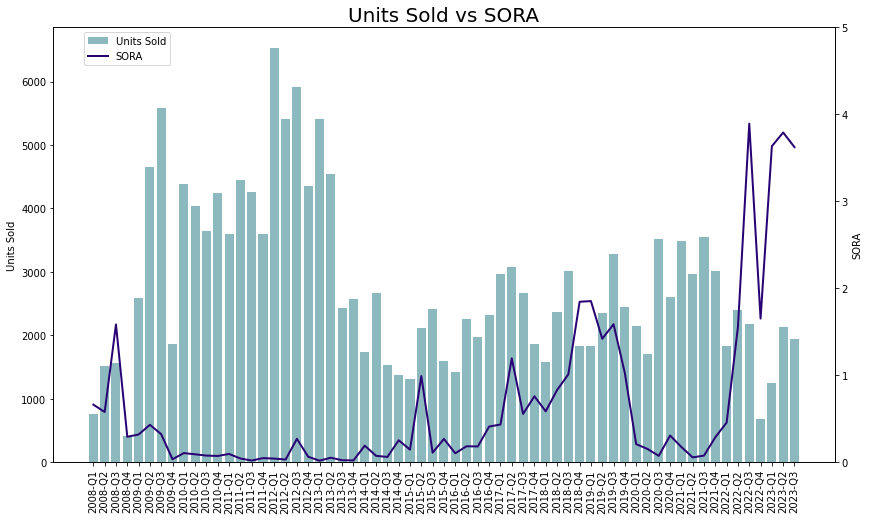

In [19]:
plt.figure(figsize=(14, 8))
fig, ax1 = plt.subplots(figsize=(14,8))

# bar chart for units sold
ax1.bar(private_property_newsale_SORA['quarter'],
        private_property_newsale_SORA['units'],
        color=color5,
        label='Units Sold')
ax1.set_ylabel('Units Sold')

# overlay line chart for SORA
ax2 = ax1.twinx()

ax2.plot(private_property_newsale_SORA['quarter'],
         private_property_newsale_SORA['SORA'],
         color=color3,
         label='SORA',
         linewidth=2)
ax2.set_ylabel('SORA')

# set y-axis limit for the line plot
ax2.set_ylim(0, 5)

# set x-axis labels at 90 degrees for easier readability
ax1.set_xticklabels(private_property_newsale_SORA['quarter'], rotation=90)

# add legend
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.88))

plt.title('Units Sold vs SORA', fontsize=20)
# plt.tight_layout()
plt.show()

## Analysis

Property prices have an inverse relationship with interest rates: lower interest rates usually means loan repayments are lower while higher interest rates mean the opposite. Unsurprisingly, based on our dataset, from Q1 2008 to Q3 2023, the correlation between the number of private property units sold and interest rates was -0.33.

From Q4 2009 to Q4 2014, Singapore experienced a low-interest rate environment, along with most of the developed world as economies were slowly recovering from the Great Financial Crisis in 2008.

During this period of very low rates, the number of private property units remained elevated with quarterly sales ranging from 3,500 to 6,500 units. Despite interest rates remaining close to zero, however, with the introduction of cooling measures by the government (mentioned in the previous section), quarterly sales declined drastically in 2013. 

Since then, the government has introduced more cooling measures to prevent the market from overheating, yet it appears that Singapore private property has proven to be an attractive investment asset.

Having said that, this analysis is not an in-depth analysis of the relationship between interest rates and property prices. Further directions one can take is to delve deeper into the sources of capital inflows and other possible price drivers.

---

# Section 3: Private Property Price Index

In this section, we will look at the private residential property as an asset class. We will use URA's Private Residential Property Price Index to visualize its performance. In addition, we will compare it to the HDB resale price index to provide a more complete context of the property market in Singapore.

**Datasets used for this section:**

- [Private Residential Property Price Index](https://beta.data.gov.sg/collections/1676/datasets/d_97f8a2e995022d311c6c68cfda6d034c/view)

- [HDB Resale Price Index](https://beta.data.gov.sg/collections/152/view)

In [20]:
private_property_index = pd.read_csv('PrivateResidentialPropertyPriceIndexBaseQuarter2009Q1100Quarterly.csv')
hdb_index = pd.read_csv('HousingAndDevelopmentBoardResalePriceIndex1Q2009100Quarterly.csv')

In [21]:
# preview data and check for null values
print(private_property_index.info())
print()
print(null_checker(private_property_index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   quarter        585 non-null    object 
 1   property_type  585 non-null    object 
 2   index          585 non-null    float64
dtypes: float64(1), object(2)
memory usage: 13.8+ KB
None

quarter: 0
property_type: 0
index: 0

Total null values in dataframe: 0
None


In [22]:
# preview data and check for null values
print(hdb_index.info())
print()
print(null_checker(hdb_index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  131 non-null    object 
 1   index    131 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB
None

quarter: 0
index: 0

Total null values in dataframe: 0
None


Based on the data information from the data.gov.sg, Q1 2009 was used as the quarter to rescale the whole dataset. Hence the timeframe we analyse will be from Q1 2009.

Also, for the private property index, we will only focus on the `Landed` and `Non-Landed` property types.

In [23]:
# filter datasets for landed and non-landed properties
# assign each to their own dataframe
private_property_index_landed = private_property_index[private_property_index['property_type'] == 'Landed']
private_property_index_non_landed = private_property_index[private_property_index['property_type'] == 'Non-Landed']

In [24]:
# apply the function to the 'quarter' column to get the actual date of quarter end
private_property_index_landed['quarter_end_date'] = private_property_index_landed['quarter'].map(quarter_end_date)

# convert the formatted string back to datetime format
private_property_index_landed['quarter_end_date'] = pd.to_datetime(private_property_index_landed['quarter_end_date'],
                                                               format='%d %m %Y')

# re-arrange columns for readability
private_property_index_landed = private_property_index_landed[['quarter','quarter_end_date', 'index']]

# trim dataset accordingly
private_property_index_landed = private_property_index_landed.loc[
    private_property_index_landed['quarter_end_date'] >= '2009']

private_property_index_landed.head()

/var/folders/gm/df7gtrln0ml0b31n9l6t167w0000gn/T/ipykernel_3788/624158457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_property_index_landed['quarter_end_date'] = private_property_index_landed['quarter'].map(quarter_end_date)
/var/folders/gm/df7gtrln0ml0b31n9l6t167w0000gn/T/ipykernel_3788/624158457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_property_index_landed['quarter_end_date'] = pd.to_datetime(private_property_index_landed['quarter_end_date'],


,quarter,quarter_end_date,index
409,2009-Q1,2009-03-31,100.0
412,2009-Q2,2009-06-30,95.3
415,2009-Q3,2009-09-30,109.5
418,2009-Q4,2009-12-31,118.6
421,2010-Q1,2010-03-31,128.4


In [25]:
# apply the function to the 'quarter' column to get the actual date of quarter end
private_property_index_non_landed['quarter_end_date'] = private_property_index_non_landed['quarter'].map(quarter_end_date)

# convert the formatted string back to datetime format
private_property_index_non_landed['quarter_end_date'] = pd.to_datetime(private_property_index_non_landed['quarter_end_date'],
                                                               format='%d %m %Y')

# re-arrange columns for readability
private_property_index_non_landed = private_property_index_non_landed[['quarter','quarter_end_date', 'index']]

# trim dataset accordingly
private_property_index_non_landed = private_property_index_non_landed.loc[
    private_property_index_non_landed['quarter_end_date'] >= '2009']

private_property_index_non_landed.head()

/var/folders/gm/df7gtrln0ml0b31n9l6t167w0000gn/T/ipykernel_3788/3599454976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_property_index_non_landed['quarter_end_date'] = private_property_index_non_landed['quarter'].map(quarter_end_date)
/var/folders/gm/df7gtrln0ml0b31n9l6t167w0000gn/T/ipykernel_3788/3599454976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_property_index_non_landed['quarter_end_date'] = pd.to_datetime(private_property_index_non_landed['quarter_end_date'],


,quarter,quarter_end_date,index
410,2009-Q1,2009-03-31,100.0
413,2009-Q2,2009-06-30,95.3
416,2009-Q3,2009-09-30,110.5
419,2009-Q4,2009-12-31,118.4
422,2010-Q1,2010-03-31,124.3


In [26]:
# apply the function to the 'quarter' column to get the actual date of quarter end
hdb_index['quarter_end_date'] = hdb_index['quarter'].map(quarter_end_date)

# convert the formatted string back to datetime format
hdb_index['quarter_end_date'] = pd.to_datetime(hdb_index['quarter_end_date'],
                                               format='%d %m %Y')

# re-arrange columns for readability
hdb_index = hdb_index[['quarter','quarter_end_date', 'index']]

# trim dataset accordingly
hdb_index = hdb_index.loc[(
    hdb_index['quarter_end_date'] >= '2009')]

hdb_index.head()

,quarter,quarter_end_date,index
76,2009-Q1,2009-03-31,100.0
77,2009-Q2,2009-06-30,101.4
78,2009-Q3,2009-09-30,105.0
79,2009-Q4,2009-12-31,109.0
80,2010-Q1,2010-03-31,112.1


In [27]:
print(f"Private Property Index (Landed) as of {private_property_index_landed.iloc[-1,0]}: {private_property_index_landed.iloc[-1,-1]}")
print(f"Private Property Index (Non-Landed) as of {private_property_index_non_landed.iloc[-1,0]}: {private_property_index_non_landed.iloc[-1,-1]}")
print(f"HDB Resale Index as of {hdb_index.iloc[-1,0]}: {hdb_index.iloc[-1,-1]}")

Private Property Index (Landed) as of 2023-Q3: 222.9
Private Property Index (Non-Landed) as of 2023-Q3: 189.8
HDB Resale Index as of 2022-Q3: 168.1


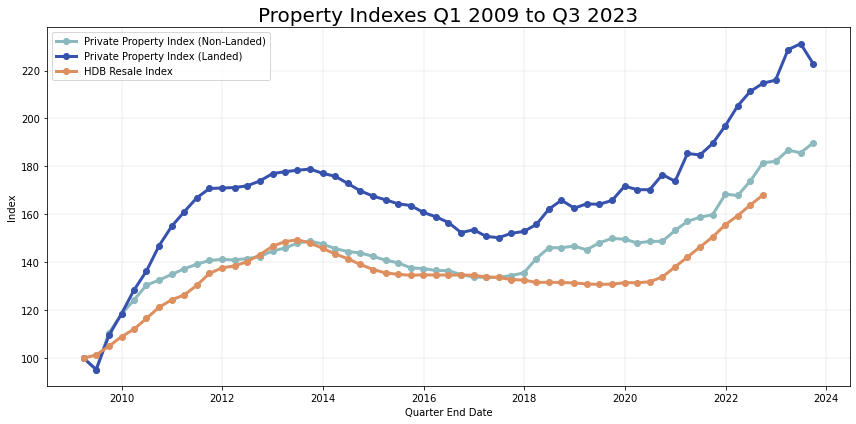

In [28]:
# Plot each DataFrame's index values
plt.figure(figsize=(12, 6))

# Plot private_property_index_non_landed
plt.plot(private_property_index_non_landed['quarter_end_date'], 
         private_property_index_non_landed['index'], 
         color=color5,
         linewidth=3,
         marker='o',
         label='Private Property Index (Non-Landed)')

# Plot private_property_index_landed
plt.plot(private_property_index_landed['quarter_end_date'], 
         private_property_index_landed['index'], 
         color=color2,
         linewidth=3,
         marker='o',
         label='Private Property Index (Landed)')

# Plot hdb_index
plt.plot(hdb_index['quarter_end_date'], 
         hdb_index['index'], 
         color=color11,
         linewidth=3,
         marker='o',
         label='HDB Resale Index')

# Add title and labels
plt.title('Property Indexes Q1 2009 to Q3 2023', fontsize=20)
plt.xlabel('Quarter End Date')
plt.ylabel('Index')
plt.grid(True, linewidth=0.2)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Analysis

From 2009 to 2013, the 3 indexes were on a broad uptrend. However, with the new cooling measures in 2013, the indexes halted their steady growth. From then till 2018, the private property indexes drifted downards. However, begining from 2018, we see these 2 indexes before resuming their strong uptrend.

Meanwhile, the HDB resale index continued to flatline as the government implemented significant cooling measures in 2018. It was not until 2020 when construction works were disrupted which delayed the delivery of new residential buildings. As a result, first-timers turned to the resale market, pushing up demand and flat prices. This is in addition to the rise of hybrid work arrangements during the nationwide lockdown as households saw the need for larger living spaces.

As of Q3 2022, the Private Property Index (Landed) was 222.9 while the the Private Property Index (Non-Landed) stood at 189.9. While no new data has been provided since Q3 2022, we can expect it to be in line with the strong uptrends exhibited by the private property indexes.

---

# Section 4: Analyzing Singapore's 3 Main Regions 

According to the the URA, Singapore is divided into [28 postal districts](https://www.ura.gov.sg/Corporate/-/media/Corporate/Property/PMI-Online/List_Of_Postal_Districts.pdf). Although the postal system has since evolved, property buyers, sellers, and agents still commonly refer to the different regions using these demarcations.

| Postal district | Area                                                | Region          |
|----------------|-----------------------------------------------------|-----------------|
| 01             | Raffles Place, Boat Quay, Suntec City, Marina downtown, Cecil, Marina, People’s Park | CCR and RCR     |
| 02             | Anson, Tanjong Pagar, Shenton Way                   | CCR and RCR     |
| 03             | Queenstown, Tiong Bahru                             | RCR             |
| 04             | Telok Blangah, Harbourfront, Sentosa                | CCR and RCR     |
| 05             | Pasir Panjang, Hong Leong Garden, Clementi          | RCR and OCR     |
| 06             | High Street, Beach Road, City Hall                   | CCR and RCR     |
| 07             | Middle Road, Golden Mile, Bugis                      | CCR and RCR     |
| 08             | Little India                                         | RCR             |
| 09             | Orchard, Cairnhill, River Valley, Somerset           | CCR             |
| 10             | Ardmore, Bukit Timah, Holland Road, Tanglin         | CCR             |
| 11             | Watten Estate, Novena, Thomson, Dunearn, Newton     | CCR             |
| 12             | Balestier, Toa Payoh                                 | RCR             |
| 13             | Macpherson, Braddell                                 | RCR             |
| 14             | Geylang, Eunos                                       | RCR and OCR     |
| 15             | Katong, Joo Chiat, Amber Road                       | RCR and OCR     |
| 16             | Bedok, Upper East Coast, Eastwood, Kew Drive        | OCR             |
| 17             | Loyang, Changi                                       | OCR             |
| 18             | Tampines, Pasir Ris                                  | OCR             |
| 19             | Serangoon Garden, Hougang, Punggol                   | OCR             |
| 20             | Bishan, Ang Mo Kio                                   | RCR and OCR     |
| 21             | Upper Bukit Timah, Clementi Park, Ulu Pandan         | OCR             |
| 22             | Jurong                                               | OCR             |
| 23             | Hillview, Dairy Farm, Bukit Panjang, Choa Chu Kang  | OCR             |
| 24             | Lim Chu Kang, Tengah                                 | OCR             |
| 25             | Kranji, Woodgrove                                    | OCR             |
| 26             | Upper Thomson, Springleaf Lentor, Springleaf, Mandai | OCR             |
| 27             | Sembawang, Yishun                                    | OCR             |
| 28             | Seletar Hill, Sengkang West, Seletar                | OCR             |


Furthermore, these 28 districts can be grouped into 3 main regions:
1. Core Central Region (CCR)
2. Rest of Central Region (RCR)
3. Outside Central Region (OCR)


Below is a map of the 28 districts and the respective regions they fall under:
![image-2.png](https://iera.s3-ap-southeast-1.amazonaws.com/personalweb/26352/nbvillprzl.jpg)

The aim of this section is to compare and analyze the property prices of the different regions in Singapore.

**Datasets used for this section:**
- [Private Property Transactions](https://www.ura.gov.sg/property-market-information/pmiResidentialTransactionSearch)

The files below were downloaded from URA. While there was the option to include landed property sales as well, these units are usually less uniform in nature; their idiosyncratic features make them less comparable to similar units in their vicinity. Hence the dataset downloaded only covers apartments and condominiums.

According to the URA, although both are non-landed residential properties, 
condominiums typically offer more generous provision of [communal and recreational facilities](https://www.ura.gov.sg/Corporate/Guidelines/Development-Control/Residential/Flats-Condominiums/Introduction) than flats developments. Nevertheless, they share more similarities than the landed properties.

Using the datasets downloaded from URA, we'll combine the data from the 28 districts into one master dataframe.

In [29]:
temp_df1 = pd.read_csv("Districts-1-to-7-pt1.csv")
temp_df2 = pd.read_csv("Districts-1-to-7-pt2.csv")
temp_df3 = pd.read_csv("Districts-1-to-7-pt3.csv")

temp_df4 = pd.read_csv("Districts-8-to-10-pt1.csv")
temp_df5 = pd.read_csv("Districts-8-to-10-pt2.csv")

temp_df6 = pd.read_csv("Districts-11-to-14-pt1.csv", encoding='latin-1')
temp_df7 = pd.read_csv("Districts-11-to-14-pt2.csv", encoding='latin-1')

temp_df8 = pd.read_csv("Districts-15-to-21-pt1.csv")
temp_df9 = pd.read_csv("Districts-15-to-21-pt2.csv")
temp_df10 = pd.read_csv("Districts-15-to-21-pt3.csv")
temp_df11 = pd.read_csv("Districts-15-to-21-pt4.csv")
temp_df12 = pd.read_csv("Districts-15-to-21-pt5.csv")

temp_df13 = pd.read_csv("Districts-22-to-28-pt1.csv")
temp_df14 = pd.read_csv("Districts-22-to-28-pt2.csv")

districts_master = pd.concat([temp_df1, temp_df2, temp_df3,
                             temp_df4, temp_df5, temp_df6,
                             temp_df7, temp_df8, temp_df9,
                             temp_df10, temp_df11, temp_df12,
                             temp_df13, temp_df14], axis=0)
districts_master

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Street Name,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Nett Price($),Property Type,Number of Units,Tenure,Postal District,Market Segment,Floor Level
0,STIRLING RESIDENCES,"1,001,000",441.32,"2,268",May-21,STIRLING ROAD,New Sale,Strata,41,"24,415",-,Apartment,1,99 yrs lease commencing from 2017,3,Rest of Central Region,26 to 30
1,STIRLING RESIDENCES,"1,124,000",505.91,"2,222",May-21,STIRLING ROAD,New Sale,Strata,47,"23,915",-,Apartment,1,99 yrs lease commencing from 2017,3,Rest of Central Region,36 to 40
2,NORMANTON PARK,"1,218,000",667.37,"1,825",May-21,NORMANTON PARK,New Sale,Strata,62,"19,645",-,Apartment,1,99 yrs lease commencing from 2019,5,Rest of Central Region,06 to 10
3,NORMANTON PARK,"1,218,609",667.37,"1,826",May-21,NORMANTON PARK,New Sale,Strata,62,"19,655",-,Apartment,1,99 yrs lease commencing from 2019,5,Rest of Central Region,06 to 10
4,NORMANTON PARK,"1,954,000","1,097.93","1,780",May-21,NORMANTON PARK,New Sale,Strata,102,"19,157",-,Apartment,1,99 yrs lease commencing from 2019,5,Rest of Central Region,06 to 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3358,THE WARREN,"1,025,000","1,237.86",828,Feb-19,CHOA CHU KANG LOOP,Resale,Strata,115,"8,913",-,Condominium,1,99 yrs lease commencing from 2001,23,Outside Central Region,01 to 05
3359,PALM GARDENS,"780,000",958,814,Feb-19,HONG SAN WALK,Resale,Strata,89,"8,764",-,Condominium,1,99 yrs lease commencing from 1996,23,Outside Central Region,11 to 15
3360,THE MAYFAIR,"1,030,000","1,173.28",878,Feb-19,JURONG EAST STREET 32,Resale,Strata,109,"9,450",-,Condominium,1,99 yrs lease commencing from 1996,22,Outside Central Region,11 to 15
3361,REGENT HEIGHTS,"825,000","1,022.58",807,Feb-19,BUKIT BATOK EAST AVENUE 5,Resale,Strata,95,"8,684",-,Condominium,1,99 yrs lease commencing from 1995,23,Outside Central Region,11 to 15


In [30]:
# check for null values
null_checker(districts_master)

Project Name: 0
Transacted Price ($): 0
Area (SQFT): 0
Unit Price ($ PSF): 0
Sale Date: 0
Street Name: 0
Type of Sale: 0
Type of Area: 0
Area (SQM): 0
Unit Price ($ PSM): 0
Nett Price($): 0
Property Type: 0
Number of Units: 0
Tenure: 0
Postal District: 0
Market Segment: 0
Floor Level: 0

Total null values in dataframe: 0


In [31]:
# preview data types
print(districts_master.info())

<class 'pandas.core.frame.DataFrame'>
Index: 101715 entries, 0 to 3362
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Project Name          101715 non-null  object
 1   Transacted Price ($)  101715 non-null  object
 2   Area (SQFT)           101715 non-null  object
 3   Unit Price ($ PSF)    101715 non-null  object
 4   Sale Date             101715 non-null  object
 5   Street Name           101715 non-null  object
 6   Type of Sale          101715 non-null  object
 7   Type of Area          101715 non-null  object
 8   Area (SQM)            101715 non-null  object
 9   Unit Price ($ PSM)    101715 non-null  object
 10  Nett Price($)         101715 non-null  object
 11  Property Type         101715 non-null  object
 12  Number of Units       101715 non-null  int64 
 13  Tenure                101715 non-null  object
 14  Postal District       101715 non-null  int64 
 15  Market Segment        10

As we can see above, other than the `Number of Units` and `Postal District`, the columns consist of string types. We will be transforming the necessary columns to integers/floats for our analysis.

In [32]:
# convert 'Sale Date' to datetime to extract year
districts_master['Sale Date'] = pd.to_datetime(districts_master['Sale Date'],
                                               errors='coerce',
                                               format='%b-%y')

# add a year column for later analysis
districts_master['Year'] = districts_master['Sale Date'].dt.year

print(f"Dataset date ranges from {districts_master['Sale Date'].min()} to {districts_master['Sale Date'].max()}")

Dataset date ranges from 2019-02-01 00:00:00 to 2024-02-01 00:00:00


Although the dataset is until 2024, it only has 1 month of data. Therefore, we will use the year 2023 as the comparison year. Below we will analyze the changes of each segment's profile and the growth each has experienced from 2019 to 2023.

In [33]:
# convert 'Transacted Price ($)' column to numeric
districts_master['Transacted Price ($)'] = pd.to_numeric(
    districts_master['Transacted Price ($)'].str.replace(',', ''), errors='coerce')

# group transactions by year
yearly_txns = districts_master.groupby('Year')['Transacted Price ($)'].sum()
yearly_txns

Year
2019    25770594642
2020    28691420419
2021    52756782066
2022    39634406024
2023    35060769302
2024     2036268272
Name: Transacted Price ($), dtype: int64

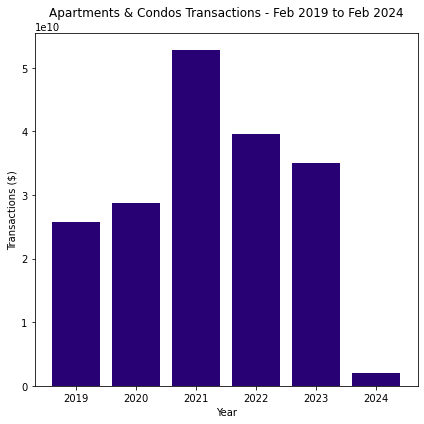

In [34]:
# create a bar chart
plt.figure(figsize=(6, 6))
plt.bar(yearly_txns.index,
        yearly_txns.values,
        color=color3)

# add title and labels
plt.title('Apartments & Condos Transactions - Feb 2019 to Feb 2024',fontsize=12)
plt.xlabel('Year')
plt.ylabel('Transactions ($)')

# show plot
plt.tight_layout()
plt.show()

We see that from 2019 to 2023, the private apartments and condominium transactions exceeded SGD25 billion annually, hitting a high of SGD52.7 billion in 2021.

Next, we break each year up into its market segments and compare the market's profile in 2019 vs 2023.

In [35]:
# group data by Year and Market Segment, then sum the Transacted Price ($) within each group
segment_total = districts_master.groupby(['Year', 'Market Segment'])['Transacted Price ($)']
segment_total = segment_total.sum().reset_index()

segment_total

,Year,Market Segment,Transacted Price ($)
0,2019,Core Central Region,8007130246
1,2019,Outside Central Region,8356315309
2,2019,Rest of Central Region,9407149087
3,2020,Core Central Region,7862893140
4,2020,Outside Central Region,10669733889
5,2020,Rest of Central Region,10158793390
6,2021,Core Central Region,17042126301
7,2021,Outside Central Region,17659613309
8,2021,Rest of Central Region,18055042456
9,2022,Core Central Region,12234267417


In [36]:
# filter data for 2019 and 2023 transactions
segment_total_2019 = segment_total[segment_total['Year'] == 2019].set_index('Market Segment')['Transacted Price ($)']
segment_total_2023 = segment_total[segment_total['Year'] == 2023].set_index('Market Segment')['Transacted Price ($)']

In [37]:
print(f'2019: {segment_total_2019}')
print()
print(f'2023: {segment_total_2023}')
print()
print(f'4-Year Change: {segment_total_2023 - segment_total_2019}')
print()
print(f'4-Year Growth Rate: {segment_total_2023 / segment_total_2019 -1}')

2019: Market Segment
Core Central Region       8007130246
Outside Central Region    8356315309
Rest of Central Region    9407149087
Name: Transacted Price ($), dtype: int64

2023: Market Segment
Core Central Region        9972718133
Outside Central Region    11647446270
Rest of Central Region    13440604899
Name: Transacted Price ($), dtype: int64

4-Year Change: Market Segment
Core Central Region       1965587887
Outside Central Region    3291130961
Rest of Central Region    4033455812
Name: Transacted Price ($), dtype: int64

4-Year Growth Rate: Market Segment
Core Central Region       0.245480
Outside Central Region    0.393850
Rest of Central Region    0.428765
Name: Transacted Price ($), dtype: float64


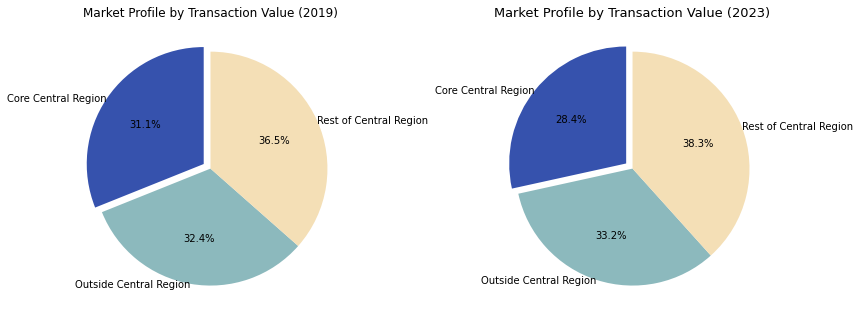

In [38]:
# pie Chart for Market Segment transaction value summation in 2019
plt.figure(figsize=(12, 6))

# set pie chart explosion and color scheme
colors = [color2,color5,color10]
explode = [0.07, 0.0, 0.0]

# pie chart for total transaction value in 2019
plt.subplot(1, 2, 1)
plt.pie(segment_total_2019,
        labels=segment_total_2019.index,
        labeldistance = 1,
        autopct='%1.1f%%',
        explode=explode,
        colors=colors,
        startangle=90)
plt.title('Market Profile by Transaction Value (2019)')

# pie chart for total transaction value in 2023
plt.subplot(1, 2, 2)
plt.pie(segment_total_2023, 
        labels=segment_total_2023.index,
        labeldistance = 1,
        autopct='%1.1f%%',
        explode=explode,
        colors=colors,
        startangle=90)
plt.title('Market Profile by Transaction Value (2023)', fontsize=13)

plt.tight_layout()
plt.show()

The transacted value of apartments and condominiums grew from SGD25.8bn in 2019 to SGD35.0bn in 2023, representing a 36.0% increase during this period. 

Nevertheless, the contribution from the 3 regions remaining stable with each contributing roughly a third. Furthermore, in 2023, none of regions' compositions deviated more than 2% from the their respective 2019 figures.

Having looked at the compostion of transaction value, in the next section, we will turn our sights to each regions' contribution to the total transaction volume.

In [39]:
# Filter data for 2019 and 2023 transactions
volume_2019 = districts_master[districts_master['Year'] == 2019]['Market Segment'].value_counts()
volume_2023 = districts_master[districts_master['Year'] == 2023]['Market Segment'].value_counts()

In [40]:
print(f"There were {volume_2019.sum()} transactions in 2019.")
print(f"There were {volume_2023.sum()} transactions in 2023.")

There were 15662 transactions in 2019.
There were 17654 transactions in 2023.


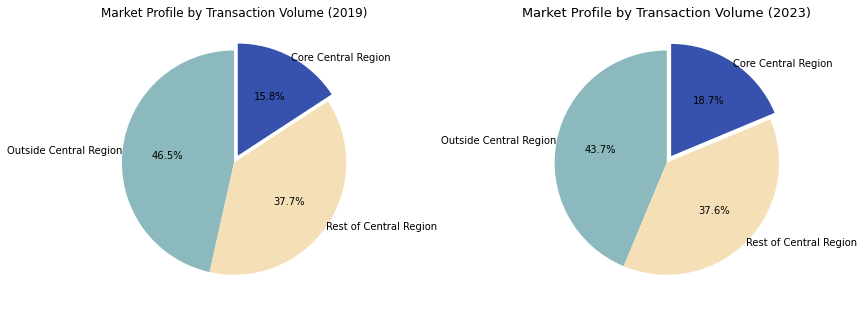

In [41]:
# Pie Chart for Market Segment distribution in 2019
plt.figure(figsize=(12, 6))

# set pie chart explosion and color scheme
colors = [color5,color10,color2]
explode = [0.0, 0.0, 0.07]

plt.subplot(1, 2, 1)
plt.pie(volume_2019,
        labels=volume_2019.index,
        labeldistance = 1,
        autopct='%1.1f%%',
        explode=explode,
        colors=colors,
        startangle=90)
plt.title('Market Profile by Transaction Volume (2019)')

# Pie Chart for Market Segment distribution in 2023
plt.subplot(1, 2, 2)
plt.pie(volume_2023,
        labels=volume_2023.index,
        labeldistance = 1,
        autopct='%1.1f%%',
        explode=explode,
        colors=colors,
        startangle=90)
plt.title('Market Profile by Transaction Volume (2023)', fontsize=13)

plt.tight_layout()
plt.show()

Despite making up 28.4% of transaction value in 2023, the Core Central region only contributed 18.7% of the 17,654 transactions. This is because the premium placed on this region by the market due to its proximity to the city's center.

Similar to the transaction value distribution, contribution from each of the 3 regions remained stable during the 2019-2023 timeframe.

In the next section, we will break down the unit price per square metre for each region. We will be comparing how the districts within each region compare with each other.

In [42]:
# convert 'Unit Price ($ PSM)' column to numeric
districts_master['Unit Price ($ PSM)'] = pd.to_numeric(districts_master['Unit Price ($ PSM)'].str.replace(',', ''),
                                                       errors='coerce')

# filter data for each region
core_central_region = districts_master[districts_master['Market Segment'] == 'Core Central Region']
rest_central_region = districts_master[districts_master['Market Segment'] == 'Rest of Central Region']
outside_central_region = districts_master[districts_master['Market Segment'] == 'Outside Central Region']

After having seprated the data into regions, we will be sorting them by median Unit Price.

In [43]:
# Core central region
# group data by postal district and show unit price
ccr_median_prices = core_central_region.groupby('Postal District')['Unit Price ($ PSM)']
# sort values by median price
ccr_median_prices = ccr_median_prices.median().sort_values()
# match the postal districts from the region df to the index of ccr_median_prices 
ccr_sorted = core_central_region[core_central_region['Postal District'].isin(ccr_median_prices.index)].copy()
# set ordered to 'true' to enable order as per median_prices.index
ccr_sorted['Postal District'] = pd.Categorical(ccr_sorted['Postal District'],
                                               categories=ccr_median_prices.index,
                                               ordered=True)

# Rest of Central Region
# group data by postal district and show unit price
rcr_median_prices = rest_central_region.groupby('Postal District')['Unit Price ($ PSM)']
#sort values by median price
rcr_median_prices = rcr_median_prices.median().sort_values()
# match the postal districts from the region df to the index of rcr_median_prices 
rcr_sorted = rest_central_region[rest_central_region['Postal District'].isin(rcr_median_prices.index)].copy()
# set ordered to 'true' to enable order as per median_prices.index
rcr_sorted['Postal District'] = pd.Categorical(rcr_sorted['Postal District'],
                                               categories=rcr_median_prices.index,
                                               ordered=True)

# Outside Central Region
# group data by postal district and show unit price
ocr_median_prices = outside_central_region.groupby('Postal District')['Unit Price ($ PSM)']
#sort values by median price
ocr_median_prices = ocr_median_prices.median().sort_values()
# match the postal districts from the region df to the index of ocr_median_prices 
ocr_sorted = outside_central_region[outside_central_region['Postal District'].isin(ocr_median_prices.index)].copy()
# set ordered to 'true' to enable order as per median_prices.index
ocr_sorted['Postal District'] = pd.Categorical(ocr_sorted['Postal District'],
                                               categories=ocr_median_prices.index,
                                               ordered=True)

In [58]:
print("Core Central Region:")
print(ccr_median_prices)
print(f"Average of Median: ${round(ccr_median_prices.mean(),1)}")
print()

print("Rest Of Central Region:")
print(rcr_median_prices)
print(f"Average of Median: ${round(rcr_median_prices.mean(),1)}")
print()

print("Outside Of Central Region:")
print(ocr_median_prices)
print(f"Average of Median: ${round(ocr_median_prices.mean(),1)}")
print()

Core Central Region:
Postal District
4     18634.0
11    20763.0
1     23719.0
2     24559.0
10    26005.0
9     26582.0
7     28197.0
6     34654.0
Name: Unit Price ($ PSM), dtype: float64
Average of Median: $25389.1

Rest Of Central Region:
Postal District
23    12047.0
1     14884.5
12    16066.0
7     17118.5
14    17500.0
20    18035.0
8     18590.5
13    18750.0
4     18876.0
5     19278.5
21    20118.0
19    20410.0
3     22033.5
15    22698.0
9     23636.0
2     25912.0
6     31047.0
Name: Unit Price ($ PSM), dtype: float64
Average of Median: $19823.6

Outside Of Central Region:
Postal District
25    10388.0
17    11639.0
27    12778.0
28    13469.0
16    13548.0
18    13931.0
14    14254.0
22    14479.0
13    14561.0
15    14758.0
23    14852.0
19    15476.0
5     17071.5
21    18287.5
20    19724.5
26    21876.0
Name: Unit Price ($ PSM), dtype: float64
Average of Median: $15068.3



/var/folders/gm/df7gtrln0ml0b31n9l6t167w0000gn/T/ipykernel_3788/3627907558.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Postal District',
/var/folders/gm/df7gtrln0ml0b31n9l6t167w0000gn/T/ipykernel_3788/3627907558.py:10: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Postal District',
/var/folders/gm/df7gtrln0ml0b31n9l6t167w0000gn/T/ipykernel_3788/3627907558.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Postal District',
/var/folders/gm/df7gtrln0ml0b31n9l6t167w0000gn/T/ipykernel_3788/3627907558.py:21: UserWarning: 
The palette list has fewer values (4) than needed (17) and w

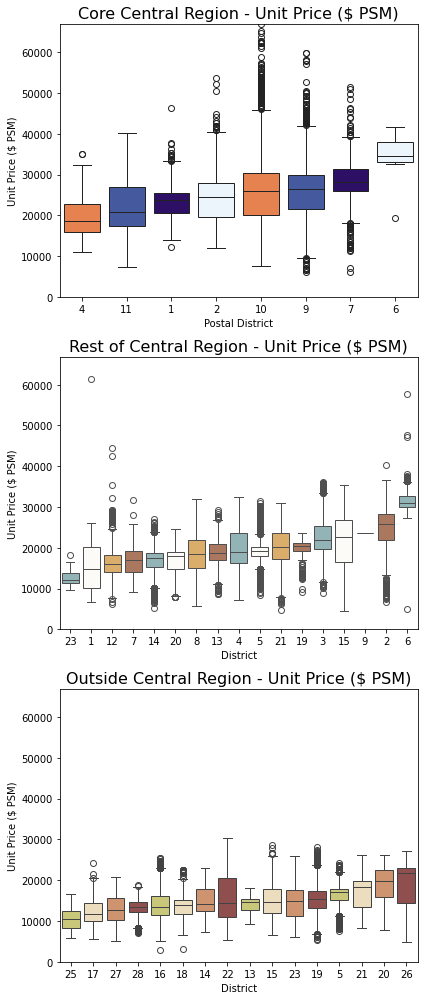

In [46]:
# set overall y-axis bounds to make the charts comparable
y_max = districts_master['Unit Price ($ PSM)'].max()

# plot sorted box plots with correct sorting and consistent y-axis bounds,
# each on its own row
plt.figure(figsize=(6, 14)) 

# plot data for core central region
plt.subplot(3, 1, 1)  
sns.boxplot(x='Postal District',
            y='Unit Price ($ PSM)',
            data=ccr_sorted,
            palette=color_palette1)
plt.title('Core Central Region - Unit Price ($ PSM)', fontsize=16)
plt.ylim([0, y_max])
plt.xlabel('Postal District')
plt.ylabel('Unit Price ($ PSM)')

# plot data for rest of central region
plt.subplot(3, 1, 2)  
sns.boxplot(x='Postal District',
            y='Unit Price ($ PSM)',
            data=rcr_sorted,
            palette=color_palette2)
plt.title('Rest of Central Region - Unit Price ($ PSM)', fontsize=16)
plt.ylim([0, y_max])
plt.xlabel('District')
plt.ylabel('Unit Price ($ PSM)')

# plot data for outside central region
plt.subplot(3, 1, 3) 
sns.boxplot(x='Postal District',
            y='Unit Price ($ PSM)',
            data=ocr_sorted,
            palette=color_palette3)
plt.title('Outside Central Region - Unit Price ($ PSM)', fontsize=16)
plt.ylim([0, y_max])
plt.xlabel('District')
plt.ylabel('Unit Price ($ PSM)')

plt.tight_layout()
plt.show()

## Analysis

Given its premium location, the districts in the Core Central Region (CCR) registered considerably higher median prices compared to the other 2 regions.

Of all the districts, district 6 had the highest median price per square metre (PSM), registering a median of SGD34,654 for apartments and condominiums located in the CCR. Even units within that district that are outside the core region command a median $ PSM of SGD31,047. A key reason for this large premium is its location - this district is at the City Hall, the heart of Singapore.

For units in districts belonging to the Rest of Central Region (RCR), there is a noticeable disparity between the top and the bottom. This is because some of the units in the top 3 districts (2, 6, and 9) are border the CCR but are classified as OCR, thus disproportinately pulling prices upward.

Compared to units in CCR and RCR, units in districts belonging to Outside the Central Region (OCR) are much less disparate. Visually, their interquartile ranges are more similar than those in the other regions. Yet it is notable that districts closer to the CCR command a higher premium than those farther away. We see this in the top 3 districts (20, 21, 26) having median PSMs that are more characteristic of districts in the RCR.

In conclusion, there are many factors that influence a apartments' and condominiums' PSMs, for example, the amount of lease remaining and proximity to schools. However in the charts we've seen above, it is clear that one of the key drivers is the proximity to the city core.

The analysis in this report is far from exhastive, but it offers a high level over of the private housing market, specifically, apartments and condominums. We take this analysis as a good starting point for more in-depth analyis and questions to delve into.